# Perspective Transforms

In Perspective Transformation, we can change the perspective of a given image or video for getting better insights into the required information. In Perspective Transformation, we need to provide the points on the image from which want to gather information by changing the perspective. We also need to provide the points inside which we want to display our image. Then, we get the perspective transform from the two given sets of points and wrap it with the original image.

_source_ : https://www.geeksforgeeks.org/perspective-transformation-python-opencv/#:~:text=In%20Perspective%20Transformation%2C%20we%20can,information%20by%20changing%20the%20perspective.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def show(image = None, title = "Image"):
    size = 16
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

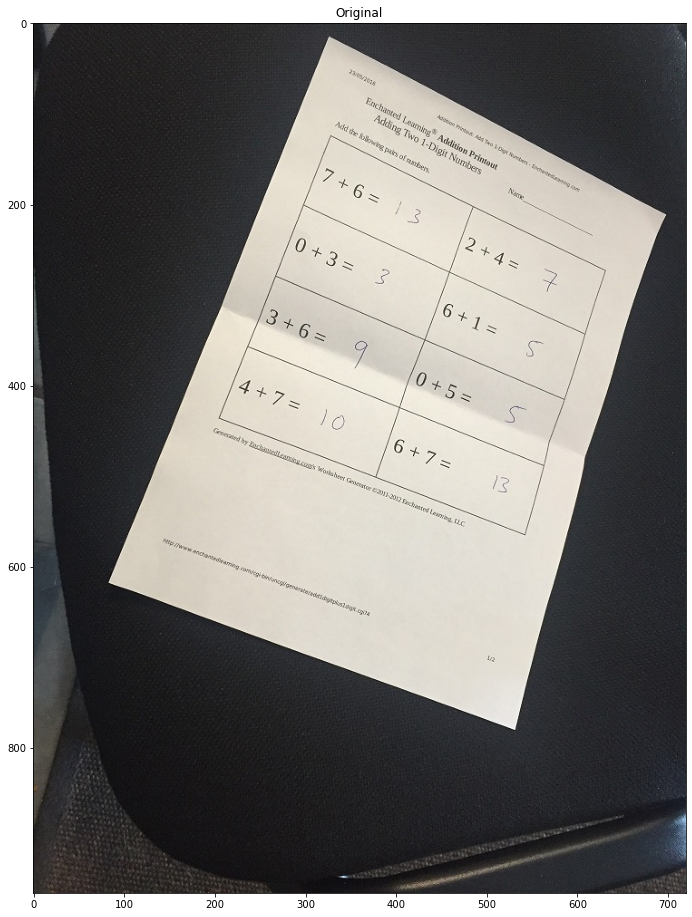

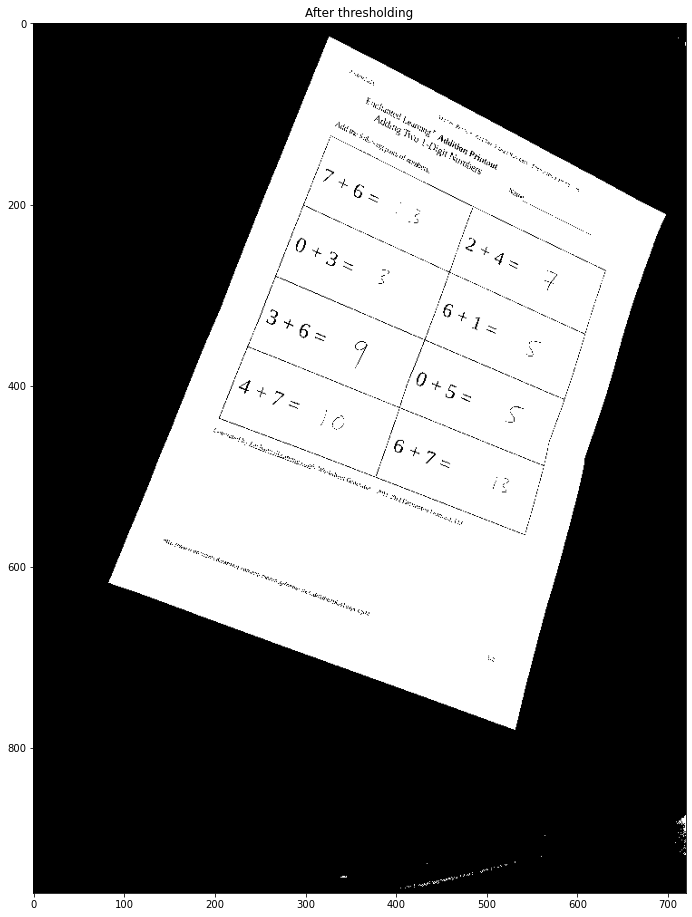

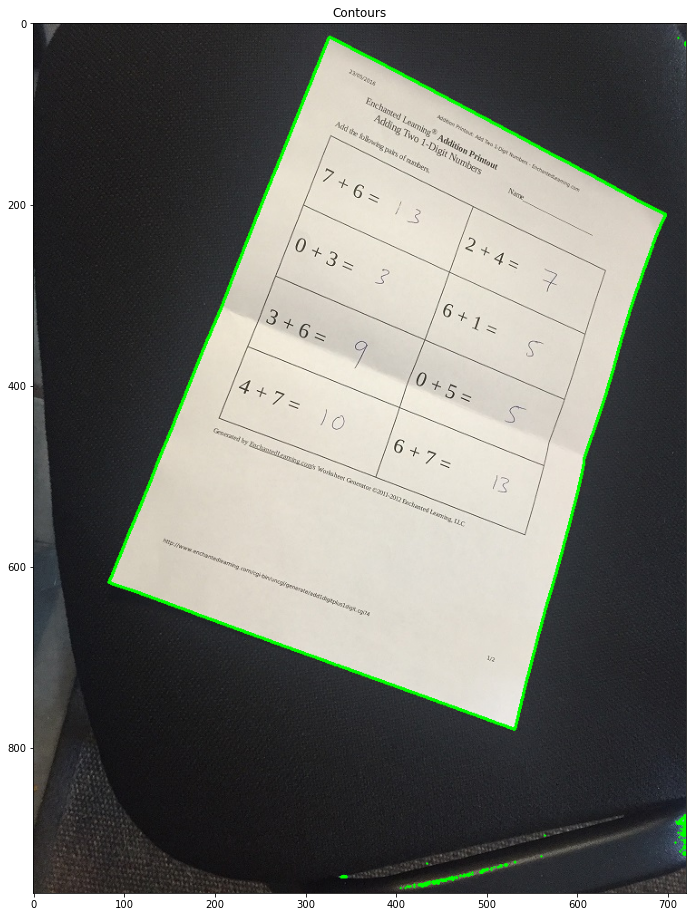

In [8]:
image = cv2.imread("images/scan.jpg")
show(image,"Original")

gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


_, th2 = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show( th2,'After thresholding')

contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
show(image, "Contours")

In [10]:
#Approximate the contour to just 4 points
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# loop over the contours
for cnt in sorted_contours:
    # approximate the contour
    perimeter = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.05 * perimeter, True)
 
    if len(approx) == 4:
        break

# Our x, y cordinates of the four corners 
print("Our 4 corner points are:")
print(approx)


Our 4 corner points are:
[[[326  15]]

 [[ 83 617]]

 [[531 779]]

 [[697 211]]]


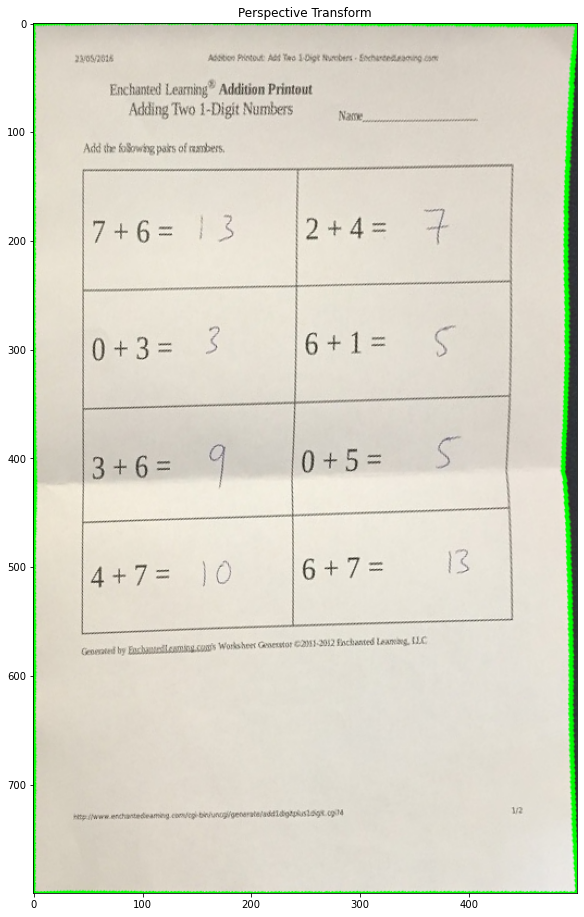

In [11]:
# Use getPerspectiveTransform and warpPerspective to create our top down view

inputPts = np.float32(approx)

outputPts = np.float32([[0,0],
                       [0,800],
                       [500,800],
                       [500,0]])

# Get our Transform Matrix, M
M = cv2.getPerspectiveTransform(inputPts,outputPts)

# Apply the transform Matrix M using Warp Perspective
dst = cv2.warpPerspective(image, M, (500,800))

show(dst,"Perspective Transform")